<a href="https://www.kaggle.com/code/priyak950/intializating-the-data?scriptVersionId=114370869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Description about data**
1. train.csv 
    * The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
    * store_nbr identifies the store at which the products are sold.
    * family identifies the type of product sold.
    * sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
    * onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
2. test.csv
    * The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
    * The dates in the test data are for the 15 days after the last date in the training data.
3. sample_submission.csv
   * A sample submission file in the correct format.
4. stores.csv
    * Store metadata, including city, state, type, and cluster.
    * cluster is a grouping of similar stores.
5. oil.csv
    * Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)
6. holidays_events.csv
 * Holidays and Events, with metadata
   NOTE: Pay special attention to the transferred column.
        * A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. 
        * Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend).
        * These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
        * Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
7. Additional Notes
    * Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
    * A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


**Observation after EDA** :

1. Oil.csv has 4% missing data and it doesn't have any correlation with hoildays date

2. Every Store_number give in transcation.csv has completed detail present in stores.csv

3. Every year hoildays count and hoildays type are different

4. In oil.csv price are missing uniformly in each year but, there is no similarity in the missing value.

5. Oil price has decrease over the year, transaction seems to be increase. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
  
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


Daily oil price. Includes values during both the train and test data timeframes. 

# Oil.csv

In [2]:
oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [3]:
oil['dcoilwtico'].isnull().value_counts()/len(oil)*100


False    96.469622
True      3.530378
Name: dcoilwtico, dtype: float64

In [4]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


# Price of oil which empty has no duplicated copy 

In [5]:
Empty_value = oil[oil['dcoilwtico'].isnull()].groupby(by='date').count().rename(columns ={'dcoilwtico' : 'dcoilwtico_empty'})
Non_Empty_value = oil[~oil['dcoilwtico'].isnull()].groupby(by='date').count().rename(columns ={'dcoilwtico' : 'dcoilwtico_non_empty'})
# Empty_value.join(Non_Empty_value, on ='date', how='inner')
Empty_value.join(Non_Empty_value, on ='date', how='inner')

,dcoilwtico_empty,dcoilwtico_non_empty
date,,


From 2011 to 2017 oil price has decreased

2017-08-31 2013-01-01


<AxesSubplot:xlabel='year'>

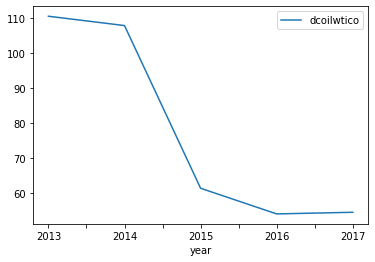

In [6]:
max_date = oil.date.max()
min_date = oil.date.min()
print(max_date,min_date)
oil['year']=oil['date'].apply(lambda x : x.split('-')[0])
oil.groupby(by = 'year').max().plot.line()

missing data analysis

In [7]:
oil.year.value_counts()
#same number missing value

2013    261
2014    261
2015    261
2016    261
2017    174
Name: year, dtype: int64

In [8]:
oil[oil['dcoilwtico'].isnull()].groupby(by='year').count()

,date,dcoilwtico
year,,
2013,9,0
2014,9,0
2015,9,0
2016,9,0
2017,7,0


In [9]:
missing_data_2013 = oil[oil['dcoilwtico'].isnull()][oil['year'] == '2013']['date'].tolist()
missing_data_2014 = oil[oil['dcoilwtico'].isnull()][oil['year'] == '2014']['date'].tolist()
missing_data_2015 = oil[oil['dcoilwtico'].isnull()][oil['year'] == '2015']['date'].tolist()
missing_data_2016 = oil[oil['dcoilwtico'].isnull()][oil['year'] == '2016']['date'].tolist()



In [10]:
for i in missing_data_2015:
    if i in missing_data_2014:
        print('match'+i)
    else:
        print('mismatch'+i)

mismatch2015-01-01
mismatch2015-01-19
mismatch2015-02-16
mismatch2015-04-03
mismatch2015-05-25
mismatch2015-07-03
mismatch2015-09-07
mismatch2015-11-26
mismatch2015-12-25


# holidays_events.csv


In [11]:
hoilday = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
hoilday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Total count of the hoildays and check missing value

In [12]:
hoilday.count()

date           350
type           350
locale         350
locale_name    350
description    350
transferred    350
dtype: int64

Check how many are transfer leave

In [13]:
hoilday['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

## check duplicated

Holidays and Events, with metadata
1. NOTE: Pay special attention to the transferred column. 
A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. 
For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. 
2. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). 
3. These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
4. Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [14]:
hoilday['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [15]:
# Check duplicated columns

hoilday[hoilday['date'].duplicated()].count()

date           38
type           38
locale         38
locale_name    38
description    38
transferred    38
dtype: int64

In [16]:
#list of date which duplicated
date_duplicated = hoilday[hoilday['date'].duplicated()]['date'].unique().tolist()
date_duplicated

['2012-06-25',
 '2012-07-03',
 '2012-12-22',
 '2012-12-24',
 '2012-12-31',
 '2013-05-12',
 '2013-06-25',
 '2013-07-03',
 '2013-12-22',
 '2014-06-25',
 '2014-07-03',
 '2014-12-22',
 '2014-12-26',
 '2015-06-25',
 '2015-07-03',
 '2015-12-22',
 '2016-04-21',
 '2016-05-01',
 '2016-05-07',
 '2016-05-08',
 '2016-05-12',
 '2016-06-25',
 '2016-07-03',
 '2016-07-24',
 '2016-11-12',
 '2016-12-22',
 '2017-04-14',
 '2017-06-25',
 '2017-07-03',
 '2017-12-08',
 '2017-12-22']

In [17]:
#Among all duplicated no one is transferred leave
hoilday[hoilday['date'].isin(date_duplicated)]['transferred'].value_counts()

False    69
Name: transferred, dtype: int64

In [18]:
#type of duplicated value present
hoilday[hoilday['date'].isin(date_duplicated)]['type'].value_counts()

Holiday       44
Additional    11
Event          8
Bridge         3
Transfer       2
Work Day       1
Name: type, dtype: int64

In [19]:
#let see two transfer value
hoilday[hoilday['date'].isin(date_duplicated)][hoilday['type'] == 'Transfer']

,date,type,locale,locale_name,description,transferred
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False


* In hoilday we have duplicated as there local name is different so we can drop the duplicated column 
* And for our price predict we doesn't need

In [20]:
hoilday = hoilday[~hoilday['date'].duplicated()]

Assert statement

In [21]:
assert(hoilday[hoilday['date'].duplicated()]['date'].count(),0)

In [22]:
#check whether missing data is present on hoildays date
oil[oil['date'].isin(hoilday['date'])]
# That assume is not True

,date,dcoilwtico,year
0,2013-01-01,NaN,2013
29,2013-02-11,97.01,2013
30,2013-02-12,97.48,2013
64,2013-04-01,97.10,2013
73,2013-04-12,91.23,2013
...,...,...,...
1190,2017-07-25,47.77,2017
1202,2017-08-10,48.54,2017
1203,2017-08-11,48.81,2017
1205,2017-08-15,47.57,2017


Year wise review the hoilday

In [23]:
hoilday['year']=hoilday['date'].apply(lambda x : x.split('-')[0])
newf = hoilday.groupby(by = ['year','type'])['date'].count()
a = pd.DataFrame(newf).reset_index(level=['year','type'])
a.pivot(index='year', columns='type')


date                                       
type Additional Bridge Event Holiday Transfer Work Day
year                                                  
2012        4.0    2.0   NaN    28.0      1.0      NaN
2013        9.0    NaN   NaN    34.0      1.0      2.0
2014        7.0    1.0  16.0    35.0      1.0      1.0
2015        8.0    1.0   3.0    35.0      NaN      1.0
2016        9.0    1.0  29.0    34.0      2.0      NaN
2017        8.0    NaN   1.0    33.0      5.0      NaN

# Store

In [24]:
store = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [25]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


<AxesSubplot:>

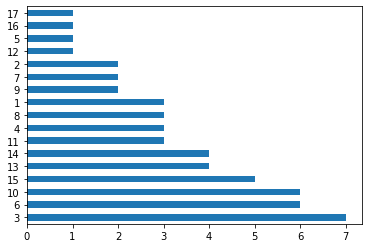

In [26]:
store['cluster'].value_counts().plot.barh()

<AxesSubplot:>

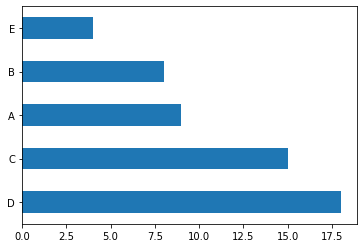

In [27]:
store['type'].value_counts().plot.barh()

# train.csv

In [28]:
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [30]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


*onpromotion* gives the total number of items in a product family that were being promoted at a store at a given date.

In [31]:
#Analysis onpromotion
train['onpromotion'].value_counts().max()

2389559

sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

In [32]:
len(train['sales'].unique())

379610

family identifies the type of product sold.

In [33]:
train['family'].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

store_nbr identifies the store at which the products are sold.

In [34]:
#Excatly the same counts as store.csv contain
len(train['store_nbr'].unique())

54

# Transcations.csv

In [35]:
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [36]:
len(transactions['store_nbr'].unique())

54

In [37]:
transactions['year']=transactions['date'].apply(lambda x : x.split('-')[0])
transactions.groupby(by='year').sum()

,store_nbr,transactions
year,,
2013,446919,29107173
2014,460794,30006929
2015,496285,31312370
2016,515086,31052337
2017,330019,20000136
